In [2]:
from fastai.basics import *
%matplotlib inline

%reload_ext autoreload
%autoreload 2


[STYLE REF SHEETS] (https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)


# For Greek letters on MBP use ^Space

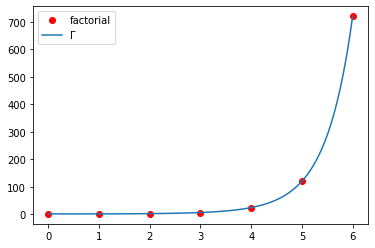

In [3]:
import math
import  matplotlib.pyplot as plt

Γ = lambda x: x.lgamma().exp()

facts=[math.factorial(i) for i in range(7)]
plt.plot(range(7), facts,'ro')
plt.plot(torch.linspace(0,6), Γ(torch.linspace(0,6)+1))
plt.legend(['factorial', 'Γ'])

#cross entropy loss
predicting the right thing and confidently(ie high nb say 0.9)  - little loss
predicting the wring thing and confidently - lot of loss
if cat log(cattiness), if dog log(1-cattiness ie dogginess)
works only if results add upto 1 ie uses softmax as activation in last layer - all > 0 and all less than 1 all add upto 1
softmax e**(activation)/ sum(e** activation) {{{ e** nb always > 0)
for multiclass - softmax and crossentropy

In [16]:
import re
string = '/data/oxford-iiit-pet/images/american_bulldog_146.jpg'
pat = r'([^/]+)_\d+.jpg$'
pat = re.compile(pat)
op = pat.search(string).group(1)
print(op)
pat2=re.compile(r'(\w*-){1,2}')
op2= pat2.findall(string)
print(op2)


american_bulldog
['iiit-']


In [4]:
#(kxl)(lxm) = kxm

m = torch.ones(5,2);m
m[:,0].uniform_(-1,1)
print(m.shape, '\n', m)

n = tensor(3.,2)
print(n.shape)
#n[:,:].uniform_(-1,1);n
#print(n)
#print(torch.matmul(m,n))
z = m@n + torch.rand(5)
print(z.shape ,'\n', z)

torch.Size([5, 2]) 
 tensor([[ 0.1476,  1.0000],
        [ 0.5084,  1.0000],
        [-0.5487,  1.0000],
        [ 0.1199,  1.0000],
        [-0.7597,  1.0000]])
torch.Size([2])
torch.Size([5]) 
 tensor([ 2.5611,  3.7840,  1.1769,  2.7050, -0.1368])


In [5]:
m1 = tensor(1.,2.,3.,4,5)
n1 = tensor(1.,2.,3.,4.,5)
print(m1.size()  , m1)
print (n1.shape , n1)

print(m1*n1)
print(m1@n1)

import numpy as np
print(np.dot(m1,n1))

p= torch.ones(4,6)
print(type(p))
print(p)

torch.Size([5]) tensor([1., 2., 3., 4., 5.])
torch.Size([5]) tensor([1., 2., 3., 4., 5.])
tensor([ 1.,  4.,  9., 16., 25.])
tensor(55.)
55.0
<class 'torch.Tensor'>
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [6]:
n=100
x=torch.ones(n,2)
x[:,0].uniform_(-1.,1);#good way of adding bias 1 for free
x[:5]

tensor([[-0.8216,  1.0000],
        [ 0.2864,  1.0000],
        [-0.7160,  1.0000],
        [-0.2229,  1.0000],
        [-0.3614,  1.0000]])

In [7]:
#y
a0 = tensor(3.,2)
y = x@a0 + torch.rand(n)

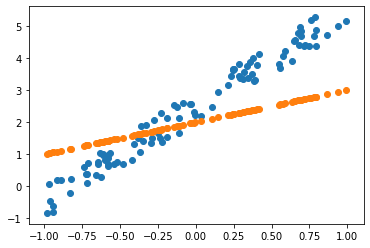

In [8]:
#rubbish guess
a1 = tensor(1.,2)
y_hat = x@a1

plt.scatter(x[:,0],y);
plt.scatter(x[:,0],y_hat)

In [9]:
#sgd without animation
def mse(y_hat,y):
    return ((y_hat-y)**2).mean()
def update(x,a):
    y_hat = x@a #preds
    loss=mse(y_hat,y)
    if t%50==0:print(loss)
    loss.backward() #grads
    with torch.no_grad():
        a.sub_(lr*a.grad) #sub lr*grad ---- sub_  -=
        a.grad.zero_()

#wt(t) = wt(t-1) - lr(dLoss/dw(t-1))

tensor(6.5769, grad_fn=<MeanBackward0>)
tensor(0.1016, grad_fn=<MeanBackward0>)


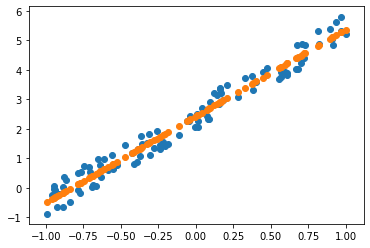

In [10]:
n=100
x = torch.ones(n,2)
x[:,0].uniform_(-1,1)
a0 = tensor(3.,2)
y=x@a0 + torch.rand(n)


lr =0.1
a = nn.Parameter(tensor(-1.,1))
for t in range(100):
    update(x,a)
    
plt.scatter(x[:,0],y);
with torch.no_grad():
    plt.scatter(x[:,0],x@a)

In [11]:
#SGD with animation
n= 100
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
a0 = tensor(3.,2)
y = x@a0 + torch.rand(n)


from matplotlib import animation, rc
rc('animation',html='jshtml')
a2 = nn.Parameter(tensor(-1.,1))

def mse2():
    return ((y_hat-y)**2).mean()
def update2():
    y_hat = x@a2
    loss=mse(y_hat,y)
    loss.backward()
    with torch.no_grad():
        a2.sub_(lr*a2.grad)
        a2.grad.zero_()

fig = plt.figure()
plt.title('MY ANIMATION')
plt.scatter(x[:,0],y,color='magenta')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a2, color='black')
plt.close()

def animate2(i):
    update2()
    with torch.no_grad():
        line.set_ydata(x@a2)
        return line,

animation.FuncAnimation(fig, animate2, np.arange(0,100),interval=20)


In [12]:
#regex match, serach, findall, finditer,
str1 = '/Users/dexterdsilva/Documents/Developer/4/fastai/course-v3/nbs/8/mnist_tiny/train/5/9829.png'
pat = r'/(\d)/'  #       r'/(\d)/\d+.png$'
pat = re.compile(pat)
matches = re.findall(pat, str1)
print('matches is of type ' , type(matches) , 'length ', len(matches))
print('second items is ' ,matches[1])
for match in matches:
    print(match)

matches is of type  <class 'list'> length  3
second items is  8
4
8
5


In [13]:
fname = '/Users/dexterdsilva/nbs/dl1/mnist_sample/train/7/doggy_20.jpg'
pat = re.compile(r'/([^/]+)_\d+.jpg$')
op = pat.finditer(fname )
print(type(op))

<class 'callable_iterator'>


In [14]:
from fastai import *
from fastai.basics import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
n=100
x=torch.ones(n,2)
x[:,0].uniform_(-1.,1)
a0 = tensor(3.,2)
y=x@a0 + torch.rand(n)

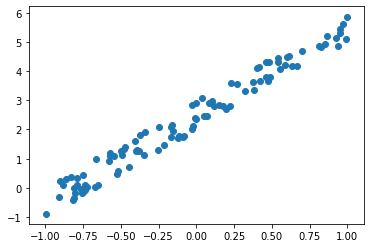

In [16]:
plt.scatter(x[:,0],y)

In [17]:
def mse(y_hat,y):
    return((y_hat-y)**2).mean()

def update():
    y_hat = x@a
    loss=mse(y_hat,y)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [25]:
lr = 0.1
a=nn.Parameter(tensor(-.1,1))
def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
        return line,
    
fig = plt.figure(figsize=(3,3))
plt.scatter(x[:,0],y, color = 'black')
with torch.no_grad():
    line, = plt.plot(x[:,0],x@a, color = 'red', marker = 'o', linestyle='-')
plt.title('Gradient Descent')
plt.close()

from matplotlib import animation ,rc
rc('animation', html='jshtml')

animation.FuncAnimation(fig, animate, np.arange(100), interval=20)







In [61]:
x=torch.ones(100,2);x
a0=tensor(3.,2);a0

tensor([3., 2.])